<a href="https://colab.research.google.com/github/dipucriodigital/ciencia-de-dados-e-analytics/blob/main/analytics-descriptive-and-predictive/Aula%2002%20-%20Introducao%20ao%20DeepLearning.ipynb" target="_blank">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/>
</a>

## LSTM

In [1]:
#Vamos ver como funcionam as LSTM
#Para estudar as Redes Long Short Term Memory vamos precisar de séries temporais

import pandas as pd

# vamos carregar a base com as médias de temperatura global ao longo dos últimos anos
datapath = "https://raw.githubusercontent.com/dipucriodigital/ciencia-de-dados-e-analytics/refs/heads/main/analytics-descriptive-and-predictive/global-temp-monthly.csv" 

data = pd.read_csv(datapath) 

data_gcag = data[data['Source'] == 'gcag'].to_numpy()

In [2]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler # minMaxScaler serve para "escalar" (normalizar) os valores em um intervalo

Y = np.zeros(shape=(len(data_gcag), 1), dtype=np.float32)

for i, y in enumerate(data_gcag):
    Y[i - 1, 0] = y[2]

mmscaler = MinMaxScaler((-1.0, 1.0)) # define o intervalo entre -1 e 1
Y = mmscaler.fit_transform(Y)  #vamos transformar os dados para escala -1 e 1

In [3]:
nb_samples = 1600      #são 1600 linhas
nb_test_samples = 200  #estamos separando as últimas 200 para teste
sequence_length = 20   #e criando janelas com 20 pontos

#define os datasets com a janela de tempo de tamanho "sequence_length"
X_ts = np.zeros(shape=(nb_samples - sequence_length, sequence_length, 1), dtype=np.float32)  #cria a array x com zeros para o tamanho fornecido e 3 dimensoes (tamanho - sequence_length, sequence_length e 1)
Y_ts = np.zeros(shape=(nb_samples - sequence_length, 1), dtype=np.float32) #cria a array y com zeros para o tamanho fornecido e 2 dimensoes (tamanho - sequence_length e 1)

#preenche as arrays
for i in range(0, nb_samples - sequence_length):
    X_ts[i] = Y[i:i + sequence_length] # aqui, adicionando as janelas para cada posição
    Y_ts[i] = Y[i + sequence_length]

#separa em dataset p/ treinamento e teste
X_ts_train = X_ts[0:nb_samples - nb_test_samples, :]
Y_ts_train = Y_ts[0:nb_samples - nb_test_samples]

X_ts_test = X_ts[nb_samples - nb_test_samples:, :]
Y_ts_test = Y_ts[nb_samples - nb_test_samples:]

In [4]:
from keras.models import Sequential
from keras.layers import Input, LSTM, Dense, Activation, Flatten

model = Sequential() # vamos criar um modelo sequencial p/ a rede neural 

model.add(Input(batch_size=20, shape=(sequence_length, 1))) # camada de entrada com batch_size fixo de 20 e shape (sequence_length, 1)
model.add(LSTM(8, stateful=True))  #define um bloco LSTM com 8 unidades
model.add(Flatten()) # a saída é transformada em um único vetor de entrada
model.add(Dense(1))  # para um único perceptron
model.add(Activation('linear')) #com ativação linear

2025-08-23 23:28:42.742405: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-23 23:28:42.749765: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-08-23 23:28:42.759803: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-08-23 23:28:42.759815: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-08-23 23:28:42.766552: I tensorflow/core/platform/cpu_feature_gua

In [5]:
from keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.001, decay=0.0001), #treinada com taxa de aprendizado 0.001
              loss='mse', # e função de perda/métrica MSE
              metrics=['mse'])

/home/jonatas/project/ciencia-de-dados-e-analytics/venv/lib/python3.10/site-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [6]:
# vamos executar o treinamento

history = model.fit(X_ts_train, Y_ts_train,
          batch_size=20, #para lotes de 20 em 20
          epochs=50, # por 50 épocas
          shuffle=False, #sem embaralhar os dados de treinamento a cada época
          validation_data=(X_ts_test, Y_ts_test)) #fazendo a validação com o conjunto separado para testes


Epoch 1/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0948 - mse: 0.0948 - val_loss: 0.0204 - val_mse: 0.0204
Epoch 2/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0151 - val_mse: 0.0151
Epoch 3/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0189 - mse: 0.0189 - val_loss: 0.0134 - val_mse: 0.0134
Epoch 4/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0124 - val_mse: 0.0124
Epoch 5/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0118 - val_mse: 0.0118
Epoch 6/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0113 - val_mse: 0.0113
Epoch 7/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 8/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 9/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0169 - mse: 

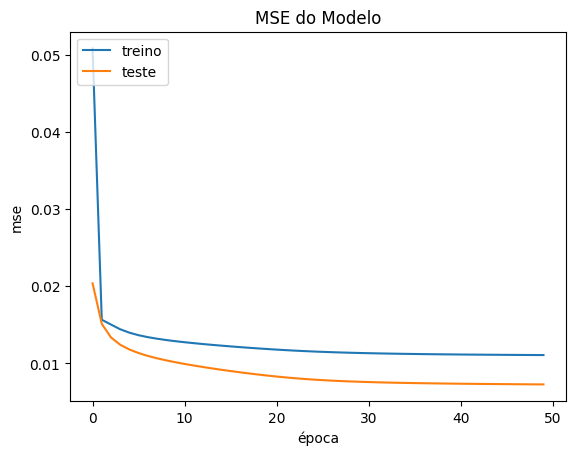

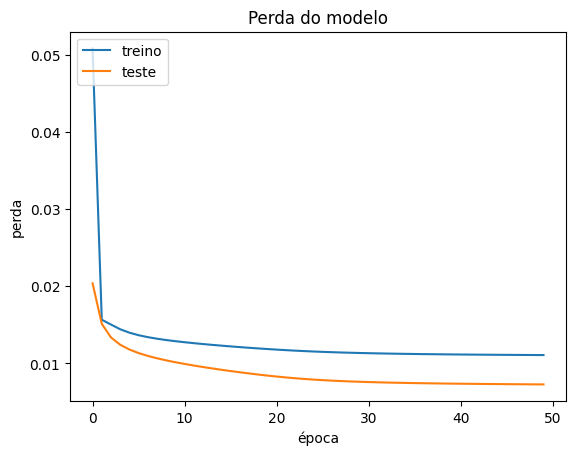

In [7]:
import matplotlib.pyplot as plt

# lista todos os dados contidos no histórico de treinamento
#print(history.history.keys())

# plotamos o erro calculado a partir do histórico
plt.plot(history.history['mse'])  # erro médio quadrático (treinamento)
plt.plot(history.history['val_mse']) # erro médio quadrático (teste)
plt.title('MSE do Modelo')
plt.ylabel('mse')
plt.xlabel('época')
plt.legend(['treino', 'teste'], loc='upper left')
plt.show()

# plotamos o erro/perda a partir do histórico
plt.plot(history.history['loss']) # perda/erro durante o treinamento
plt.plot(history.history['val_loss']) #perda/erro durante a validação (teste)
plt.title('Perda do modelo')
plt.ylabel('perda')
plt.xlabel('época')
plt.legend(['treino', 'teste'], loc='upper left')
plt.show()




70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 612us/step


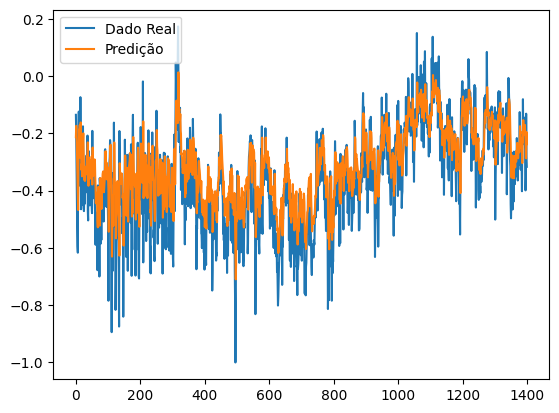

In [8]:
# Agora, vamos visualizar os dados reais vs os dados calculados na predição (usando os dados de treinamento)
plt.plot(Y_ts_train) #plota dados originais
plt.plot(model.predict(X_ts_train, batch_size=20)) #plota dados resultantes
plt.legend(['Dado Real', 'Predição'], loc='upper left')
plt.show()

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 640us/step


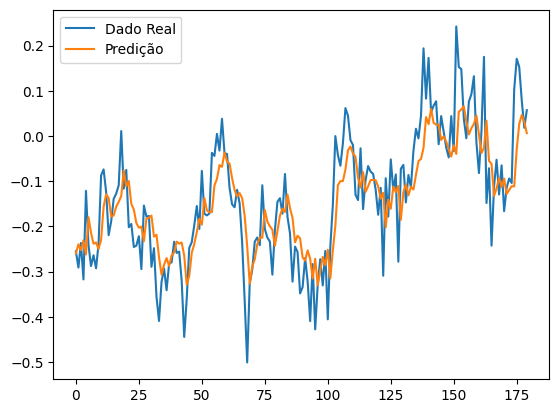

In [9]:
# e vamos visualizar os dados reais vs os dados calculados na predição (usando os dados de validação)
plt.plot(Y_ts_test)
plt.plot(model.predict(X_ts_test, batch_size=20))
plt.legend(['Dado Real', 'Predição'], loc='upper left')
plt.show()

## Autoencoder

In [10]:
#nestes exemplos de autoencoder, vamos usar imagens que serao analisadas, codificadas e decodificadas
#para isto, usamos a biblioteca de imagens PIL

import numpy as np
from PIL import Image #biblioteca de imagens

from keras.datasets import fashion_mnist #dataset acadêmico clássico MNIST com imagens de roupas

(X_train, _), (_, _) = fashion_mnist.load_data() # o dataset já vem com separações recomendadas para treinamento e teste

#definimos os parâmetros de treinamento como:
nb_samples = 1000 # número de amostras
nb_epochs = 50 # número de epocas
batch_size = 200 # tamanho dos batchs de treinamento
code_length = 256 # tamanho do código gerado pela codificação

X_train = X_train.astype(np.float32)[0:nb_samples] / 255.0  # aqui, transformamos os valores da imagem que inicialmente seguem intervalo 0-255 p/ intervalo 0-1
#assim, podemos usar na rede sem distorções

width = X_train.shape[1] #largura das amostras
height = X_train.shape[2] #altura das amostras

In [11]:
#agora, vamos configurar manualmente nosso autoencoder usando TensorFlow 2 / Keras
import tensorflow as tf
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Conv2DTranspose, Reshape, Lambda


input_images = Input(shape=(width, height, 1), name='input_images') #recebemos imagens com (width, height, 1) 1 unico canal de cores
r_input_images = Lambda(lambda x: tf.image.resize(x, (32, 32)), name='resize')(input_images) # que são redimensionadas para 32 x 32

# Encoder
conv_0 = Conv2D(filters=32, kernel_size=(3, 3), strides=(2, 2), activation='relu', padding='same')(r_input_images) #camada convolucional de 32 filtros 
conv_1 = Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same')(conv_0) #camada convolucional de 64 filtros 
conv_2 = Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same')(conv_1) #camada convolucional de 128 filtros 

# o aumento dimensional é criado para definir as regiões do espaço vetorial e entregar as variáveis de codificação com tamanho de code_length

# Flatten + code
code_input = Flatten()(conv_2) 
code_layer = Dense(units=code_length, activation='sigmoid', name='code_layer')(code_input) # para encerrar a rede decoder - uma rede MLP classica com ativação sigmoide

# Decoder
decoder_dense = Dense(units=16 * 16 * 1, activation=None, name='decoder_dense')(code_layer) # recebe os 256 valores definidos pelo code_length
decoder_reshape = Reshape((16, 16, 1), name='decoder_reshape')(decoder_dense)

convt_0 = Conv2DTranspose(filters=128, kernel_size=(3, 3), strides=(2, 2), activation='relu', padding='same')(decoder_reshape) # faz o processo reverso para chegarmos na imagem de 32x32
convt_1 = Conv2DTranspose(filters=64, kernel_size=(3, 3), activation='relu', padding='same')(convt_0)
convt_2 = Conv2DTranspose(filters=32, kernel_size=(3, 3), activation='relu', padding='same')(convt_1)
convt_3 = Conv2DTranspose(filters=1, kernel_size=(3, 3), activation='sigmoid', padding='same', name='reconstruction')(convt_2)

# Modelo autoencoder
autoencoder = Model(inputs=input_images, outputs=convt_3, name='autoencoder')

# Compila o modelo com otimizador Adam e MSE (equivalente ao l2_loss usado antes)
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse')

# mostra um resumo compacto do modelo
autoencoder.summary()


Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_images (InputLayer)       │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resize (Lambda)                 │ (None, 32, 32, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 16, 16, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ code_layer (Dense)              │ (None, 256)            │     8,388,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_dense (Dense)           │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_reshape (Reshape)       │ (None, 16, 16, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 32, 32, 128)    │         1,280 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 32, 32, 64)     │        73,792 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 32, 32, 32)     │        18,464 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reconstruction                  │ (None, 32, 32, 1)      │           289 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641,153 (32.96 MB)

 Trainable params: 8,641,153 (32.96 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
#treinamento do autoencoder usando TF2 / Keras
import numpy as np

# prepara dados (X_train já existe no notebook, com valores em [0,1])
X = X_train[0:nb_samples].astype('float32')
X = np.expand_dims(X, axis=-1)  # shape = (nb_samples, width, height, 1)
X_targets = tf.image.resize(X, (32, 32)).numpy().astype('float32')  # shape = (nb_samples, 32, 32, 1)

# treina o modelo usando model.fit
history = autoencoder.fit(
    X, 
    X_targets,
    epochs=nb_epochs,
    batch_size=batch_size,
    shuffle=True,
    validation_split=0.1,
    verbose=1
)

# imprime resumo simples do histórico (perda média)
print('Última perda de treino:', history.history['loss'][-1])


Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 239ms/step - loss: 0.1524 - val_loss: 0.1029
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 201ms/step - loss: 0.1030 - val_loss: 0.0814
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 204ms/step - loss: 0.0838 - val_loss: 0.0701
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 201ms/step - loss: 0.0710 - val_loss: 0.0575
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 217ms/step - loss: 0.0585 - val_loss: 0.0499
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 217ms/step - loss: 0.0524 - val_loss: 0.0451
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 221ms/step - loss: 0.0475 - val_loss: 0.0416
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 220ms/step - loss: 0.0431 - val_loss: 0.0390
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 214ms/step - loss: 0.0414 - val_loss: 0.0369
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 207ms/step - loss: 0.0395 - val_loss: 0.0350
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 211ms/step - loss: 0.0365 - val_loss: 0.0333
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 210ms/step - loss: 0.0351 - val_lo

In [13]:
import numpy as np

encoder = Model(inputs=input_images, outputs=code_layer, name='encoder')

# gera os códigos (representações) para o conjunto de treino
X_full = np.expand_dims(X_train[0:nb_samples].astype('float32'), axis=-1)
codes = encoder.predict(X_full)

print(np.mean(codes))  # verificação do valor médio dos códigos


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
0.4018964


In [14]:
import numpy as np

# seleciona 10 amostras e prediz usando o autoencoder
Xs = np.reshape(X_train[0:10], (10, width, height, 1)).astype('float32')
Ys = autoencoder.predict(Xs)

# converte 0-1 para 0-255 para exibição (uint8)
Ys = np.squeeze((Ys * 255.0).astype('uint8'))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


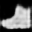

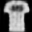

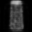

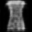

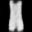

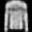

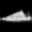

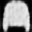

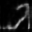

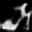

In [15]:
import IPython

#exibe a saída com as 10 imagens decodificadas
for i in range(0,10):
    im = Image.fromarray(X_train[i] * 255.0)
    if im.mode != 'RGB':
        im = im.convert('RGB')
    IPython.display.display(im)

    im = Image.fromarray(Ys[i])
    if im.mode != 'RGB':
        im = im.convert('RGB')
    IPython.display.display(im)

### GAN

In [16]:
#Deep Convolutional Generative Adversarial Network

import tensorflow as tf
from tensorflow.keras.layers import Conv2DTranspose, BatchNormalization, LeakyReLU, Reshape, Input, Conv2D
from tensorflow.keras import Model


# definindo o gerador

def build_generator(code_length):
    """Retorna um modelo gerador que mapeia vetores de ruído (code_length) para imagens 64x64x1 com saída tanh."""
    inp = Input(shape=(code_length,), name='z_input')
    x = Reshape((1, 1, code_length))(inp)

    x = Conv2DTranspose(1024, (4, 4), padding='valid')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)

    x = Conv2DTranspose(512, (4, 4), strides=(2, 2), padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)

    x = Conv2DTranspose(256, (4, 4), strides=(2, 2), padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)

    x = Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)

    # output 64x64x1
    x = Conv2DTranspose(1, (4, 4), strides=(2, 2), padding='same', activation='tanh')(x)

    return Model(inp, x, name='generator')


# definindo o discriminador

def build_discriminator(input_shape=(64, 64, 1)):
    """Retorna um modelo discriminador que mapeia imagens 64x64x1 para um mapa de logits."""
    inp = Input(shape=input_shape)

    x = Conv2D(128, (4, 4), strides=(2, 2), padding='same')(inp)
    x = LeakyReLU()(x)

    x = Conv2D(256, (4, 4), strides=(2, 2), padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)

    x = Conv2D(512, (4, 4), strides=(2, 2), padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)

    x = Conv2D(1024, (4, 4), strides=(2, 2), padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)

    # final conv -> logits
    x = Conv2D(1, (4, 4), padding='valid')(x)

    return Model(inp, x, name='discriminator')



In [17]:
import tensorflow as tf
import numpy as np

# parâmetros
code_length = 100
nb_epochs = 200
batch_size = 128

generator = build_generator(code_length)
discriminator = build_discriminator((64, 64, 1))

bce = tf.keras.losses.BinaryCrossentropy(from_logits=True)
opt_g = tf.keras.optimizers.Adam(0.0002, beta_1=0.5)
opt_d = tf.keras.optimizers.Adam(0.0002, beta_1=0.5)

# preparar dataset: X_train já definido (valores esperados em [-1,1])
X = np.expand_dims(X_train, axis=-1).astype('float32')  # (nb_samples, w, h, 1)

def preprocess(x):
    x = tf.image.resize(x, (64, 64))
    return x

dataset = tf.data.Dataset.from_tensor_slices(X)
dataset = dataset.map(lambda x: preprocess(x), num_parallel_calls=tf.data.AUTOTUNE) # redimensionando as imagens
dataset = dataset.shuffle(buffer_size=nb_samples).batch(batch_size, drop_remainder=True).prefetch(tf.data.AUTOTUNE) # pré-carregando os dados

@tf.function
def train_step(real_images):
    batch_size = tf.shape(real_images)[0]
    noise = tf.random.uniform((batch_size, code_length), -1.0, 1.0)

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:

        # gerando imagens falsas a partir do vetor de ruído
        generated = generator(noise, training=True)

        # discriminando imagens reais e falsas
        real_logits = discriminator(real_images, training=True)
        fake_logits = discriminator(generated, training=True)

        # calculando o loss do discriminador
        d_loss_real = bce(tf.ones_like(real_logits), real_logits)
        d_loss_fake = bce(tf.zeros_like(fake_logits), fake_logits)
        d_loss = d_loss_real + d_loss_fake

        # calculando o loss do gerador
        g_loss = bce(tf.ones_like(fake_logits), fake_logits)

    gradients_d = disc_tape.gradient(d_loss, discriminator.trainable_variables)
    gradients_g = gen_tape.gradient(g_loss, generator.trainable_variables)

    opt_d.apply_gradients(zip(gradients_d, discriminator.trainable_variables))
    opt_g.apply_gradients(zip(gradients_g, generator.trainable_variables))

    return d_loss, g_loss

print('Models built. Generator summary:')
generator.summary()
print('Discriminator summary:')
discriminator.summary()


Models built. Generator summary:


Model: "generator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ z_input (InputLayer)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 1, 1, 100)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_3              │ (None, 4, 4, 1024)     │     1,639,424 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 4, 4, 1024)     │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 4, 4, 1024)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_4              │ (None, 8, 8, 512)      │     8,389,120 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 8, 8, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_5              │ (None, 16, 16, 256)    │     2,097,408 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_6              │ (None, 32, 32, 128)    │       524,416 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_7              │ (None, 64, 64, 1)      │         2,049 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,660,097 (48.29 MB)

 Trainable params: 12,656,257 (48.28 MB)

 Non-trainable params: 3,840 (15.00 KB)

Discriminator summary:


Model: "discriminator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 64, 64, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 128)    │         2,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 256)    │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 512)      │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 4, 4, 1024)     │     8,389,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 4, 4, 1024)     │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_7 (LeakyReLU)       │ (None, 4, 4, 1024)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 1, 1, 1)        │        16,385 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,037,569 (42.10 MB)

 Trainable params: 11,033,985 (42.09 MB)

 Non-trainable params: 3,584 (14.00 KB)

In [18]:
# Treinamento
import time

for epoch in range(nb_epochs):
    start = time.time()
    d_losses = []
    g_losses = []

    for real_batch in dataset:
        d_loss, g_loss = train_step(real_batch)
        d_losses.append(d_loss.numpy())
        g_losses.append(g_loss.numpy())

    print('Epoch {}: Avg. d_loss={:.4f}, Avg. g_loss={:.4f} (took {:.1f}s)'.format(
        epoch + 1, np.mean(d_losses), np.mean(g_losses), time.time() - start))


2025-08-23 23:29:59.887935: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 1: Avg. d_loss=4.3530, Avg. g_loss=8.8125 (took 12.1s)


2025-08-23 23:30:10.001559: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 2: Avg. d_loss=1.3595, Avg. g_loss=18.8869 (took 10.1s)


2025-08-23 23:30:20.902727: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 3: Avg. d_loss=1.0371, Avg. g_loss=28.4758 (took 10.9s)


2025-08-23 23:30:31.763733: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 4: Avg. d_loss=0.0802, Avg. g_loss=35.6399 (took 10.9s)


2025-08-23 23:30:42.424523: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 5: Avg. d_loss=0.3841, Avg. g_loss=29.5546 (took 10.7s)


2025-08-23 23:30:52.876743: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 6: Avg. d_loss=0.2831, Avg. g_loss=16.7340 (took 10.5s)


2025-08-23 23:31:03.395490: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 7: Avg. d_loss=0.7600, Avg. g_loss=14.7406 (took 10.5s)


2025-08-23 23:31:13.901928: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 8: Avg. d_loss=1.1226, Avg. g_loss=7.2747 (took 10.5s)


2025-08-23 23:31:24.448776: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 9: Avg. d_loss=1.2992, Avg. g_loss=8.9247 (took 10.5s)


2025-08-23 23:31:34.914435: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 10: Avg. d_loss=0.9897, Avg. g_loss=6.8581 (took 10.5s)


2025-08-23 23:31:45.352770: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 11: Avg. d_loss=1.2920, Avg. g_loss=5.2393 (took 10.4s)


2025-08-23 23:31:55.855793: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 12: Avg. d_loss=1.0430, Avg. g_loss=3.2925 (took 10.5s)


2025-08-23 23:32:06.432959: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 13: Avg. d_loss=1.1439, Avg. g_loss=4.0617 (took 10.6s)


2025-08-23 23:32:17.067421: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 14: Avg. d_loss=1.0716, Avg. g_loss=2.6822 (took 10.6s)


2025-08-23 23:32:27.617538: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 15: Avg. d_loss=1.2877, Avg. g_loss=3.2350 (took 10.5s)


2025-08-23 23:32:38.257199: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 16: Avg. d_loss=0.7638, Avg. g_loss=1.6596 (took 10.6s)


2025-08-23 23:32:48.796029: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 17: Avg. d_loss=0.5693, Avg. g_loss=1.8898 (took 10.5s)


2025-08-23 23:32:59.395538: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 18: Avg. d_loss=0.6997, Avg. g_loss=2.7272 (took 10.6s)


2025-08-23 23:33:10.006644: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 19: Avg. d_loss=0.5611, Avg. g_loss=2.8846 (took 10.6s)


2025-08-23 23:33:20.564634: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 20: Avg. d_loss=0.5309, Avg. g_loss=3.0419 (took 10.6s)


2025-08-23 23:33:31.090870: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 21: Avg. d_loss=0.7892, Avg. g_loss=2.8848 (took 10.5s)


2025-08-23 23:33:41.663238: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 22: Avg. d_loss=0.5240, Avg. g_loss=2.6067 (took 10.6s)


2025-08-23 23:33:52.270315: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 23: Avg. d_loss=0.6999, Avg. g_loss=3.6579 (took 10.6s)


2025-08-23 23:34:02.984961: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 24: Avg. d_loss=0.8980, Avg. g_loss=2.9183 (took 10.7s)


2025-08-23 23:34:13.565096: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 25: Avg. d_loss=0.6271, Avg. g_loss=2.0147 (took 10.6s)


2025-08-23 23:34:24.169689: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 26: Avg. d_loss=1.1665, Avg. g_loss=2.7820 (took 10.6s)


2025-08-23 23:34:34.716650: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 27: Avg. d_loss=0.5207, Avg. g_loss=2.1776 (took 10.5s)


2025-08-23 23:34:45.366918: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 28: Avg. d_loss=0.5173, Avg. g_loss=2.7456 (took 10.7s)


2025-08-23 23:34:56.054368: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 29: Avg. d_loss=0.3796, Avg. g_loss=2.8044 (took 10.7s)


2025-08-23 23:35:06.762348: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 30: Avg. d_loss=0.2736, Avg. g_loss=2.7185 (took 10.7s)


2025-08-23 23:35:17.404563: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 31: Avg. d_loss=0.2377, Avg. g_loss=3.2787 (took 10.6s)


2025-08-23 23:35:28.062460: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 32: Avg. d_loss=0.2871, Avg. g_loss=3.0566 (took 10.7s)


2025-08-23 23:35:38.789463: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 33: Avg. d_loss=0.1512, Avg. g_loss=3.0744 (took 10.7s)


2025-08-23 23:35:49.425832: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 34: Avg. d_loss=1.7499, Avg. g_loss=3.2950 (took 10.6s)


2025-08-23 23:36:00.154585: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 35: Avg. d_loss=0.6375, Avg. g_loss=2.0626 (took 10.7s)


2025-08-23 23:36:10.852719: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 36: Avg. d_loss=0.4923, Avg. g_loss=1.9986 (took 10.7s)


2025-08-23 23:36:21.594811: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 37: Avg. d_loss=0.9063, Avg. g_loss=2.8680 (took 10.7s)


2025-08-23 23:36:32.249903: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 38: Avg. d_loss=0.3765, Avg. g_loss=2.5930 (took 10.7s)


2025-08-23 23:36:42.890583: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 39: Avg. d_loss=0.3488, Avg. g_loss=2.7474 (took 10.6s)


2025-08-23 23:36:53.563240: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 40: Avg. d_loss=0.2399, Avg. g_loss=3.0619 (took 10.7s)


2025-08-23 23:37:04.364635: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 41: Avg. d_loss=0.2461, Avg. g_loss=3.0493 (took 10.8s)


2025-08-23 23:37:15.087079: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 42: Avg. d_loss=0.9468, Avg. g_loss=3.5411 (took 10.7s)


2025-08-23 23:37:25.857097: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 43: Avg. d_loss=0.8306, Avg. g_loss=2.5419 (took 10.8s)


2025-08-23 23:37:36.532026: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 44: Avg. d_loss=0.4522, Avg. g_loss=3.0930 (took 10.7s)


2025-08-23 23:37:47.241148: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 45: Avg. d_loss=0.2717, Avg. g_loss=2.6565 (took 10.7s)


2025-08-23 23:37:57.955703: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 46: Avg. d_loss=0.3227, Avg. g_loss=3.1281 (took 10.7s)


2025-08-23 23:38:08.619201: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 47: Avg. d_loss=1.0776, Avg. g_loss=4.4365 (took 10.7s)


2025-08-23 23:38:19.329735: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 48: Avg. d_loss=0.3695, Avg. g_loss=2.7566 (took 10.7s)


2025-08-23 23:38:30.115284: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 49: Avg. d_loss=0.2599, Avg. g_loss=2.7927 (took 10.8s)


2025-08-23 23:38:40.818452: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 50: Avg. d_loss=0.2696, Avg. g_loss=3.5338 (took 10.7s)


2025-08-23 23:38:51.592023: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 51: Avg. d_loss=0.5355, Avg. g_loss=4.2603 (took 10.8s)


2025-08-23 23:39:02.343362: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 52: Avg. d_loss=0.3176, Avg. g_loss=2.9096 (took 10.8s)


2025-08-23 23:39:13.170334: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 53: Avg. d_loss=1.0753, Avg. g_loss=3.7734 (took 10.8s)


2025-08-23 23:39:23.946647: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 54: Avg. d_loss=0.4530, Avg. g_loss=2.9772 (took 10.8s)


2025-08-23 23:39:34.655436: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 55: Avg. d_loss=0.2020, Avg. g_loss=3.0462 (took 10.7s)


2025-08-23 23:39:45.305502: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 56: Avg. d_loss=0.1553, Avg. g_loss=3.6909 (took 10.7s)


2025-08-23 23:39:55.929556: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 57: Avg. d_loss=0.3408, Avg. g_loss=3.5210 (took 10.6s)


2025-08-23 23:40:06.659826: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 58: Avg. d_loss=0.1860, Avg. g_loss=3.4834 (took 10.7s)


2025-08-23 23:40:17.387361: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 59: Avg. d_loss=0.1382, Avg. g_loss=3.6683 (took 10.7s)


2025-08-23 23:40:28.059048: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 60: Avg. d_loss=0.1092, Avg. g_loss=3.6779 (took 10.7s)


2025-08-23 23:40:38.750034: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 61: Avg. d_loss=2.5692, Avg. g_loss=5.2281 (took 10.7s)


2025-08-23 23:40:49.567700: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 62: Avg. d_loss=0.5765, Avg. g_loss=3.1761 (took 10.8s)


2025-08-23 23:41:00.381070: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 63: Avg. d_loss=0.4865, Avg. g_loss=2.3623 (took 10.8s)


2025-08-23 23:41:11.175467: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 64: Avg. d_loss=1.1426, Avg. g_loss=2.9076 (took 10.8s)


2025-08-23 23:41:21.845379: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 65: Avg. d_loss=0.4540, Avg. g_loss=2.1225 (took 10.7s)


2025-08-23 23:41:32.580876: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 66: Avg. d_loss=0.3535, Avg. g_loss=2.2984 (took 10.7s)


2025-08-23 23:41:43.388429: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 67: Avg. d_loss=0.3486, Avg. g_loss=2.5553 (took 10.8s)


2025-08-23 23:41:54.157652: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 68: Avg. d_loss=0.2405, Avg. g_loss=2.7782 (took 10.8s)


2025-08-23 23:42:04.904781: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 69: Avg. d_loss=0.1796, Avg. g_loss=3.1156 (took 10.7s)


2025-08-23 23:42:15.684355: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 70: Avg. d_loss=0.9347, Avg. g_loss=4.3873 (took 10.8s)


2025-08-23 23:42:26.397746: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 71: Avg. d_loss=0.4992, Avg. g_loss=2.7829 (took 10.7s)


2025-08-23 23:42:37.115003: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 72: Avg. d_loss=0.3449, Avg. g_loss=2.5719 (took 10.7s)


2025-08-23 23:42:47.846397: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 73: Avg. d_loss=0.2554, Avg. g_loss=3.2433 (took 10.7s)


2025-08-23 23:42:58.590145: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 74: Avg. d_loss=0.2118, Avg. g_loss=2.9176 (took 10.7s)


2025-08-23 23:43:09.246640: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 75: Avg. d_loss=0.9717, Avg. g_loss=4.7997 (took 10.7s)


2025-08-23 23:43:20.026379: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 76: Avg. d_loss=0.5245, Avg. g_loss=3.4813 (took 10.8s)


2025-08-23 23:43:30.868733: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 77: Avg. d_loss=0.2805, Avg. g_loss=2.7523 (took 10.8s)


2025-08-23 23:43:41.573467: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 78: Avg. d_loss=0.1635, Avg. g_loss=3.1088 (took 10.7s)


2025-08-23 23:43:52.267813: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 79: Avg. d_loss=0.1006, Avg. g_loss=3.6705 (took 10.7s)


2025-08-23 23:44:02.984000: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 80: Avg. d_loss=0.0853, Avg. g_loss=3.9583 (took 10.7s)


2025-08-23 23:44:13.676047: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 81: Avg. d_loss=0.1012, Avg. g_loss=4.3143 (took 10.7s)


2025-08-23 23:44:24.418506: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 82: Avg. d_loss=1.1628, Avg. g_loss=4.8081 (took 10.7s)


2025-08-23 23:44:35.161859: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 83: Avg. d_loss=0.4076, Avg. g_loss=2.6928 (took 10.7s)


2025-08-23 23:44:45.933695: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 84: Avg. d_loss=0.2106, Avg. g_loss=3.1432 (took 10.8s)


2025-08-23 23:44:56.729496: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 85: Avg. d_loss=0.3251, Avg. g_loss=3.2956 (took 10.8s)


2025-08-23 23:45:07.532520: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 86: Avg. d_loss=0.3986, Avg. g_loss=4.0115 (took 10.8s)


2025-08-23 23:45:18.298789: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 87: Avg. d_loss=0.1108, Avg. g_loss=4.0619 (took 10.8s)


2025-08-23 23:45:29.022008: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 88: Avg. d_loss=0.5508, Avg. g_loss=4.3151 (took 10.7s)


2025-08-23 23:45:39.797796: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 89: Avg. d_loss=0.1411, Avg. g_loss=3.7186 (took 10.8s)


2025-08-23 23:45:50.643373: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 90: Avg. d_loss=0.1001, Avg. g_loss=3.6181 (took 10.8s)


2025-08-23 23:46:01.547469: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 91: Avg. d_loss=0.0951, Avg. g_loss=3.8192 (took 10.9s)


2025-08-23 23:46:12.371793: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 92: Avg. d_loss=0.1548, Avg. g_loss=3.9805 (took 10.8s)


2025-08-23 23:46:22.993898: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 93: Avg. d_loss=0.0761, Avg. g_loss=4.6194 (took 10.6s)


2025-08-23 23:46:33.780146: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 94: Avg. d_loss=0.0841, Avg. g_loss=4.4383 (took 10.8s)


2025-08-23 23:46:44.564093: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 95: Avg. d_loss=0.0984, Avg. g_loss=4.7039 (took 10.8s)


2025-08-23 23:46:55.392304: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 96: Avg. d_loss=0.1352, Avg. g_loss=4.6132 (took 10.8s)


2025-08-23 23:47:06.267091: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 97: Avg. d_loss=0.4975, Avg. g_loss=5.3091 (took 10.9s)


2025-08-23 23:47:17.099385: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 98: Avg. d_loss=0.7965, Avg. g_loss=5.3631 (took 10.8s)


2025-08-23 23:47:27.846887: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 99: Avg. d_loss=0.2003, Avg. g_loss=3.3391 (took 10.7s)


2025-08-23 23:47:38.597048: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 100: Avg. d_loss=0.1708, Avg. g_loss=3.2575 (took 10.7s)


2025-08-23 23:47:49.397390: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 101: Avg. d_loss=0.3381, Avg. g_loss=4.3585 (took 10.8s)


2025-08-23 23:48:00.251042: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 102: Avg. d_loss=0.9166, Avg. g_loss=4.7832 (took 10.9s)


2025-08-23 23:48:11.062407: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 103: Avg. d_loss=0.6863, Avg. g_loss=4.0046 (took 10.8s)


2025-08-23 23:48:21.848474: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 104: Avg. d_loss=0.4134, Avg. g_loss=3.3897 (took 10.8s)


2025-08-23 23:48:32.602097: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 105: Avg. d_loss=0.2482, Avg. g_loss=3.2718 (took 10.8s)


2025-08-23 23:48:43.267474: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 106: Avg. d_loss=0.1076, Avg. g_loss=3.7447 (took 10.7s)


2025-08-23 23:48:53.395469: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 107: Avg. d_loss=0.3362, Avg. g_loss=3.6041 (took 10.1s)


2025-08-23 23:49:04.020518: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 108: Avg. d_loss=0.1706, Avg. g_loss=3.9220 (took 10.6s)


2025-08-23 23:49:15.118634: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 109: Avg. d_loss=0.2030, Avg. g_loss=3.8256 (took 11.1s)


2025-08-23 23:49:26.275321: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 110: Avg. d_loss=0.2666, Avg. g_loss=4.7390 (took 11.2s)


2025-08-23 23:49:37.296746: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 111: Avg. d_loss=0.0754, Avg. g_loss=4.0559 (took 11.0s)


2025-08-23 23:49:48.124216: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 112: Avg. d_loss=1.0571, Avg. g_loss=4.8229 (took 10.8s)


2025-08-23 23:49:59.082411: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 113: Avg. d_loss=0.3883, Avg. g_loss=3.7316 (took 11.0s)


2025-08-23 23:50:09.966688: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 114: Avg. d_loss=0.2647, Avg. g_loss=3.3066 (took 10.9s)


2025-08-23 23:50:20.768985: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 115: Avg. d_loss=0.1731, Avg. g_loss=3.7933 (took 10.8s)


2025-08-23 23:50:31.662753: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 116: Avg. d_loss=0.1540, Avg. g_loss=4.0647 (took 10.9s)


2025-08-23 23:50:42.555262: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 117: Avg. d_loss=0.0823, Avg. g_loss=4.1060 (took 10.9s)


2025-08-23 23:50:53.391123: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 118: Avg. d_loss=0.0697, Avg. g_loss=4.5065 (took 10.8s)


2025-08-23 23:51:04.285055: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 119: Avg. d_loss=0.0716, Avg. g_loss=4.1608 (took 10.9s)


2025-08-23 23:51:15.009280: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 120: Avg. d_loss=0.2660, Avg. g_loss=4.8840 (took 10.7s)


2025-08-23 23:51:25.736968: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 121: Avg. d_loss=0.9849, Avg. g_loss=6.1400 (took 10.7s)


2025-08-23 23:51:36.527865: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 122: Avg. d_loss=0.3180, Avg. g_loss=3.0326 (took 10.8s)


2025-08-23 23:51:47.321923: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 123: Avg. d_loss=0.7136, Avg. g_loss=4.4123 (took 10.8s)


2025-08-23 23:51:58.111541: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 124: Avg. d_loss=0.3312, Avg. g_loss=3.5254 (took 10.8s)


2025-08-23 23:52:08.933653: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 125: Avg. d_loss=0.2935, Avg. g_loss=3.1657 (took 10.8s)


2025-08-23 23:52:19.806613: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 126: Avg. d_loss=0.1452, Avg. g_loss=4.2995 (took 10.9s)


2025-08-23 23:52:30.588182: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 127: Avg. d_loss=0.1459, Avg. g_loss=3.7062 (took 10.8s)


2025-08-23 23:52:41.475589: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 128: Avg. d_loss=0.9450, Avg. g_loss=4.4054 (took 10.9s)


2025-08-23 23:52:52.407678: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 129: Avg. d_loss=0.4954, Avg. g_loss=2.9874 (took 10.9s)


2025-08-23 23:53:03.362781: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 130: Avg. d_loss=0.1969, Avg. g_loss=3.8245 (took 11.0s)


2025-08-23 23:53:14.192471: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 131: Avg. d_loss=0.1561, Avg. g_loss=3.8682 (took 10.8s)


2025-08-23 23:53:25.018827: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 132: Avg. d_loss=0.3062, Avg. g_loss=4.2716 (took 10.8s)


2025-08-23 23:53:35.920738: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 133: Avg. d_loss=0.1146, Avg. g_loss=3.5803 (took 10.9s)


2025-08-23 23:53:46.788418: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 134: Avg. d_loss=0.4134, Avg. g_loss=5.4502 (took 10.9s)


2025-08-23 23:53:57.650639: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 135: Avg. d_loss=0.0874, Avg. g_loss=5.1202 (took 10.9s)


2025-08-23 23:54:08.481532: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 136: Avg. d_loss=0.1340, Avg. g_loss=4.7381 (took 10.8s)


2025-08-23 23:54:19.402222: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 137: Avg. d_loss=0.0513, Avg. g_loss=4.2617 (took 10.9s)


2025-08-23 23:54:30.279119: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 138: Avg. d_loss=0.0749, Avg. g_loss=4.5026 (took 10.9s)


2025-08-23 23:54:41.181893: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 139: Avg. d_loss=0.0308, Avg. g_loss=5.6263 (took 10.9s)


2025-08-23 23:54:52.002853: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 140: Avg. d_loss=0.0435, Avg. g_loss=5.1138 (took 10.8s)


2025-08-23 23:55:02.895873: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 141: Avg. d_loss=0.0499, Avg. g_loss=4.6523 (took 10.9s)


2025-08-23 23:55:13.744018: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 142: Avg. d_loss=0.0456, Avg. g_loss=5.5795 (took 10.8s)


2025-08-23 23:55:24.539053: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 143: Avg. d_loss=0.0797, Avg. g_loss=5.6915 (took 10.8s)


2025-08-23 23:55:35.349264: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 144: Avg. d_loss=0.1707, Avg. g_loss=5.7886 (took 10.8s)


2025-08-23 23:55:46.222553: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 145: Avg. d_loss=0.2341, Avg. g_loss=6.0200 (took 10.9s)


2025-08-23 23:55:57.086891: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 146: Avg. d_loss=0.1957, Avg. g_loss=4.4384 (took 10.9s)


2025-08-23 23:56:07.969690: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 147: Avg. d_loss=0.1096, Avg. g_loss=4.0738 (took 10.9s)


2025-08-23 23:56:18.821138: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 148: Avg. d_loss=0.1592, Avg. g_loss=5.4896 (took 10.9s)


2025-08-23 23:56:29.632769: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 149: Avg. d_loss=0.0574, Avg. g_loss=5.5366 (took 10.8s)


2025-08-23 23:56:40.419739: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 150: Avg. d_loss=0.0686, Avg. g_loss=4.0476 (took 10.8s)


2025-08-23 23:56:51.153916: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 151: Avg. d_loss=0.0442, Avg. g_loss=4.9872 (took 10.7s)


2025-08-23 23:57:02.044916: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 152: Avg. d_loss=0.0410, Avg. g_loss=5.1480 (took 10.9s)


2025-08-23 23:57:12.875595: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 153: Avg. d_loss=0.1681, Avg. g_loss=5.0609 (took 10.8s)


2025-08-23 23:57:23.668091: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 154: Avg. d_loss=0.1729, Avg. g_loss=5.7195 (took 10.8s)


2025-08-23 23:57:34.536811: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 155: Avg. d_loss=0.6377, Avg. g_loss=6.9352 (took 10.9s)


2025-08-23 23:57:45.403567: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 156: Avg. d_loss=1.6200, Avg. g_loss=5.1647 (took 10.9s)


2025-08-23 23:57:56.187604: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 157: Avg. d_loss=0.5787, Avg. g_loss=4.0093 (took 10.8s)


2025-08-23 23:58:07.133625: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 158: Avg. d_loss=0.2765, Avg. g_loss=3.3628 (took 10.9s)


2025-08-23 23:58:17.456583: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 159: Avg. d_loss=0.2176, Avg. g_loss=3.8538 (took 10.3s)


2025-08-23 23:58:27.686738: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 160: Avg. d_loss=0.1144, Avg. g_loss=4.4484 (took 10.2s)


2025-08-23 23:58:39.361874: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 161: Avg. d_loss=0.0868, Avg. g_loss=4.0154 (took 11.7s)


2025-08-23 23:58:49.529989: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 162: Avg. d_loss=0.0678, Avg. g_loss=3.9318 (took 10.2s)


2025-08-23 23:58:59.897214: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 163: Avg. d_loss=0.4644, Avg. g_loss=3.8858 (took 10.4s)


2025-08-23 23:59:11.167342: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 164: Avg. d_loss=1.6338, Avg. g_loss=5.8422 (took 11.3s)


2025-08-23 23:59:22.366278: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 165: Avg. d_loss=0.5822, Avg. g_loss=4.0903 (took 11.2s)


2025-08-23 23:59:33.401692: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 166: Avg. d_loss=0.2948, Avg. g_loss=3.1578 (took 11.0s)


2025-08-23 23:59:44.407931: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 167: Avg. d_loss=0.6767, Avg. g_loss=4.6193 (took 11.0s)


2025-08-23 23:59:55.323469: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 168: Avg. d_loss=0.4409, Avg. g_loss=3.8008 (took 10.9s)


2025-08-24 00:00:06.178500: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 169: Avg. d_loss=0.1602, Avg. g_loss=3.6255 (took 10.9s)


2025-08-24 00:00:17.001671: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 170: Avg. d_loss=0.1114, Avg. g_loss=3.5545 (took 10.8s)


2025-08-24 00:00:27.785430: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 171: Avg. d_loss=0.1021, Avg. g_loss=4.2616 (took 10.8s)


2025-08-24 00:00:38.662368: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 172: Avg. d_loss=0.2359, Avg. g_loss=4.7651 (took 10.9s)


2025-08-24 00:00:49.544650: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 173: Avg. d_loss=0.1857, Avg. g_loss=4.5027 (took 10.9s)


2025-08-24 00:01:00.346068: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 174: Avg. d_loss=0.1094, Avg. g_loss=4.5980 (took 10.8s)


2025-08-24 00:01:11.256050: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 175: Avg. d_loss=0.0966, Avg. g_loss=5.4131 (took 10.9s)


2025-08-24 00:01:22.160889: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 176: Avg. d_loss=0.0584, Avg. g_loss=4.1913 (took 10.9s)


2025-08-24 00:01:33.045579: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 177: Avg. d_loss=0.0586, Avg. g_loss=4.7068 (took 10.9s)


2025-08-24 00:01:43.927397: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 178: Avg. d_loss=0.0439, Avg. g_loss=5.5718 (took 10.9s)


2025-08-24 00:01:54.822742: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 179: Avg. d_loss=0.0421, Avg. g_loss=5.1142 (took 10.9s)


2025-08-24 00:02:05.688039: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 180: Avg. d_loss=0.8160, Avg. g_loss=5.3253 (took 10.9s)


2025-08-24 00:02:16.500500: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 181: Avg. d_loss=2.9274, Avg. g_loss=4.7566 (took 10.8s)


2025-08-24 00:02:27.350312: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 182: Avg. d_loss=0.4357, Avg. g_loss=2.7316 (took 10.8s)


2025-08-24 00:02:38.342256: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 183: Avg. d_loss=0.8113, Avg. g_loss=3.4793 (took 11.0s)


2025-08-24 00:02:49.341245: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 184: Avg. d_loss=1.0346, Avg. g_loss=4.2959 (took 11.0s)


2025-08-24 00:03:00.074523: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 185: Avg. d_loss=0.3732, Avg. g_loss=2.8096 (took 10.7s)


2025-08-24 00:03:10.911974: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 186: Avg. d_loss=0.7294, Avg. g_loss=3.1948 (took 10.8s)


2025-08-24 00:03:21.821862: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 187: Avg. d_loss=0.3908, Avg. g_loss=3.7422 (took 10.9s)


2025-08-24 00:03:32.667961: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 188: Avg. d_loss=0.7167, Avg. g_loss=3.5330 (took 10.8s)


2025-08-24 00:03:43.482779: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 189: Avg. d_loss=0.2293, Avg. g_loss=2.9745 (took 10.8s)


2025-08-24 00:03:54.397280: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 190: Avg. d_loss=0.1395, Avg. g_loss=3.1805 (took 10.9s)


2025-08-24 00:04:05.310399: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 191: Avg. d_loss=0.1289, Avg. g_loss=3.3847 (took 10.9s)


2025-08-24 00:04:16.255255: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 192: Avg. d_loss=0.1071, Avg. g_loss=3.5425 (took 10.9s)


2025-08-24 00:04:27.180054: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 193: Avg. d_loss=0.0885, Avg. g_loss=3.7577 (took 10.9s)


2025-08-24 00:04:38.029792: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 194: Avg. d_loss=1.7086, Avg. g_loss=5.4631 (took 10.8s)


2025-08-24 00:04:49.015125: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 195: Avg. d_loss=0.4014, Avg. g_loss=3.4532 (took 11.0s)


2025-08-24 00:05:00.130972: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 196: Avg. d_loss=0.4330, Avg. g_loss=2.6457 (took 11.1s)


2025-08-24 00:05:11.056577: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 197: Avg. d_loss=0.2728, Avg. g_loss=3.2349 (took 10.9s)


2025-08-24 00:05:21.973374: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 198: Avg. d_loss=0.2421, Avg. g_loss=2.7406 (took 10.9s)


2025-08-24 00:05:32.912155: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 199: Avg. d_loss=0.1779, Avg. g_loss=3.6016 (took 10.9s)
Epoch 200: Avg. d_loss=0.1427, Avg. g_loss=4.0992 (took 10.9s)


2025-08-24 00:05:43.807591: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [19]:
# Geração de amostras após treino

import numpy as np

Z = np.random.uniform(-1.0, 1.0, size=(50, code_length)).astype(np.float32)
Ys = generator.predict(Z)

# generator tem saída em tanh [-1,1]; converte para 0-255
Ys = np.squeeze(((Ys + 1.0) * 0.5 * 255.0)).astype(np.uint8)

# agora Ys é um array de 50 imagens 64x64


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/stepWARNING:tensorflow:5 out of the last 35 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x7dd3ac785a20> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


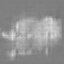

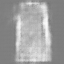

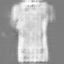

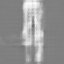

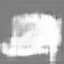

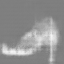

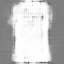

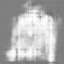

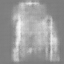

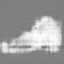

In [20]:
#exibe a saída com as 10 imagens

from PIL import Image

for i in range(0,10):    
    im = Image.fromarray(Ys[i])
    if im.mode != 'RGB':
        im = im.convert('RGB')
    display(im)